In [216]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
import pycm 

FOLDER = 'out'

In [217]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'../*/{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out: 243


In [218]:
compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    print(res_full)
    summary = {
        'size': res_full['train_size'],
        #'test_size': len(res_full['predictions']),
        'representation': res_full['data_summary']['representation'],
        'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true']))
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

{'results': {'accuracy': 0.82, 'acc_macro': 0.82, 'racc': 0.6200000000000001, 'kappa': 0.526315789473684, 'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1]), 'f1_macro': 0.76, 'f1_micro': 0.82, 'frac_valid': 1.0, 'all_y_true': [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], 'all_y_pred': array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0]), 'valid_indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'might_have_rounded_floats': False}, 'predictions': array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0

In [235]:
compiled_res = pd.DataFrame(compiled_res_list)
compiled_res = compiled_res.loc[compiled_res['num_epochs']==25]
compiled_res = compiled_res.loc[compiled_res['size']==50]
grouped_res =compiled_res.groupby(['target','bins', 'num_epochs', 'size','representation']).agg(['mean', 'sem'])


In [236]:
grouped_res



accuracy            f1_macro  \
                                                    mean       sem      mean   
target   bins num_epochs size representation                                   
HER_bool 2    25         50   elements_linkers  0.857143  0.013746  0.828876   
                              elements_nodes    0.793651  0.020998  0.750913   
                              elemetns_all      0.873016  0.007937  0.844636   
                              mofid             0.888889  0.015873  0.864960   
                              mofkey            0.894309  0.021510  0.871931   
OER_bool 2    25         50   elements_linkers  0.825397  0.020998  0.779521   
                              elements_nodes    0.904762  0.013746  0.882664   
                              elemetns_all      0.888889  0.007937  0.867350   
                              mofid             0.865079  0.028615  0.832448   
                              mofkey            0.837398  0.032520  0.797461   
VIS_bool 2    25         50   elements_linkers  0.888889  0.007937  0.872802   
                              elements_nodes    0.738095  0.013746  0.669846   
                              elemetns_all      0.896825  0.007937  0.878272   
                              mofid             0.928571  0.000000  0.923149   
                              mofkey            0.869919  0.058627  0.823321   

                                                          f1_micro            \
                                                     sem      mean       sem   
target   bins num_epochs size representation                                   
HER_bool 2    25         50   elements_linkers  0.010853  0.857143  0.013746   
                              elements_nodes    0.026899  0.793651  0.020998   
                              elemetns_all      0.015587  0.873016  0.007937   
                              mofid             0.025135  0.888889  0.015873   
                              mofkey            0.031122  0.894309  0.021510   
OER_bool 2    25         50   elements_linkers  0.027198  0.825397  0.020998   
                              elements_nodes    0.022384  0.904762  0.013746   
                              elemetns_all      0.013874  0.888889  0.007937   
                              mofid             0.048406  0.865079  0.028615   
                              mofkey            0.049826  0.837398  0.032520   
VIS_bool 2    25         50   elements_linkers  0.008945  0.888889  0.007937   
                              elements_nodes    0.022473  0.738095  0.013746   
                              elemetns_all      0.010322  0.896825  0.007937   
                              mofid             0.001195  0.928571  0.000000   
                              mofkey            0.091353  0.869919  0.058627   

                                                   kappa                lr  \
                                                    mean       sem    mean   
target   bins num_epochs size representation                                 
HER_bool 2    25         50   elements_linkers  0.663317  0.021315  0.0003   
                              elements_nodes    0.505806  0.052716  0.0003   
                              elemetns_all      0.694241  0.028555  0.0003   
                              mofid             0.734111  0.047558  0.0003   
                              mofkey            0.748089  0.059330  0.0003   
OER_bool 2    25         50   elements_linkers  0.565214  0.052666  0.0003   
                              elements_nodes    0.767326  0.042989  0.0003   
                              elemetns_all      0.737939  0.026132  0.0003   
                              mofid             0.670418  0.092593  0.0003   
                              mofkey            0.606336  0.091401  0.0003   
VIS_bool 2    25         50   elements_linkers  0.748018  0.017273  0.0003   
                              elements_nodes    0.362883  0.039486  0.0003

{'mofid': [0.89, 0.87, 0.93], 'elements_linkers': [0.86, 0.83, 0.89], 'elements_nodes': [0.79, 0.9, 0.74], 'elemetns_all': [0.87, 0.89, 0.9], 'mofkey': [0.89, 0.84, 0.87]}


/tmp/ipykernel_98074/235036005.py:60: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


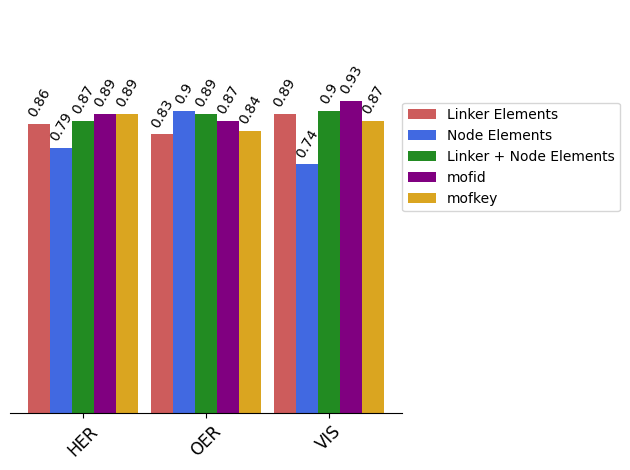

In [246]:
import numpy as np


grouped_res2 =compiled_res.groupby(['bins', 'num_epochs', 'size','representation', 'target']).agg(['mean', 'sem'])

properties = ['HER', 'OER', 'VIS']
full_acc_dict = {}

for representation in compiled_res['representation'].unique():
    sub_df = grouped_res2.loc[2, 25, 50, representation]


    acc_dict = {representation:[round(i,2) for i in sub_df['accuracy']['mean']]}
    full_acc_dict.update(acc_dict)
print(full_acc_dict)

new_dict = {'Linker Elements':full_acc_dict['elements_linkers'],
            'Node Elements':full_acc_dict['elements_nodes'],
            'Linker + Node Elements':full_acc_dict['elemetns_all'],
            'mofid':full_acc_dict['mofid'],
            'mofkey':full_acc_dict['mofkey']
            }

COLORS = {'Linker Elements':'indianred',
            'Node Elements':'royalblue',
            'Linker + Node Elements': 'forestgreen',
            'mofid': 'purple',
            'mofkey':'goldenrod'
            }


fig, ax = plt.subplots(layout='constrained')
x = np.arange(len(properties))  # the label locations
width = 0.18 # the width of the bars
multiplier = 0

for attribute, measurement in new_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color = COLORS[attribute])
    ax.bar_label(rects, padding=3, rotation = 60)
    multiplier += 1

ax.set_ylabel('Accuracy')

ax.get_yaxis().set_visible(False)
ax.spines[['right', 'top', 'left']].set_visible(False)

# Calculate the center of each group of bars
group_centers = x + (width * 2) * np.arange(len(properties))

# Set the x-ticks at the center of each group
ax.set_xticks(group_centers)

# Set the x-labels to your property values and center them between groups
ax.set_xticklabels(properties, rotation=45, ha="center", size =12)

ax.set_xticks(x + width+width, properties)
ax.legend(loc=(1,0.5))
ax.set_ylim(0, 1.2)
plt.tight_layout()

plt.savefig('accuracies.pdf')

In [247]:
df = pd.read_csv('../final_noDuplicates.csv')
print(df.columns)

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'mofid', 'mofkey',
       'smiles_nodes', 'smiles_linkers', 'smiles', 'topology', 'cifname',
       'HER_bool', 'OER_bool', 'VIS_bool', 'four_classes', 'inorg_BB',
       'inorg_BB_top', 'hased_linker', 'HOV_bool', 'HOV_code',
       'elements_linkers', 'elements_nodes', 'elemetns_all'],
      dtype='object')


In [278]:
df['HER_bool'].value_counts()

HER_bool
1    61
0    31
Name: count, dtype: int64

[]

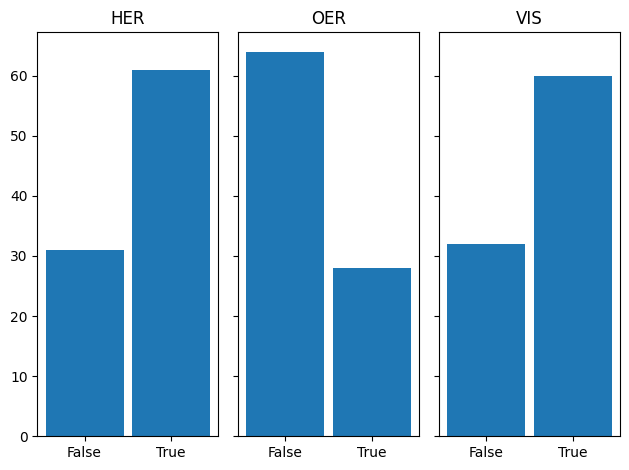

In [281]:
fig, ax = plt.subplots(1,3, tight_layout = True, sharey= True)

LABELS = ['False', 'True']
ax[0].hist(df['HER_bool'], rwidth = 0.9, bins = 2, label = LABELS)
ax[0].set_title('HER')

custom_xtick_positions = [0.25, 0.75]  # Adjust the positions as needed
ax[0].set_xticks(custom_xtick_positions, LABELS)

ax[1].hist(df['OER_bool'], rwidth = 0.9, bins = 2)
ax[1].set_title('OER')
ax[1].set_xticks(custom_xtick_positions, LABELS)


ax[2].hist(df['VIS_bool'], rwidth = 0.9, bins = 2)
ax[2].set_title('VIS')
ax[2].set_xticks(custom_xtick_positions, LABELS)

plt.savefig('data_bins.pdf')
plt.plot()

KeyError: ('VIS_bool', 2, 8, 'mofid')

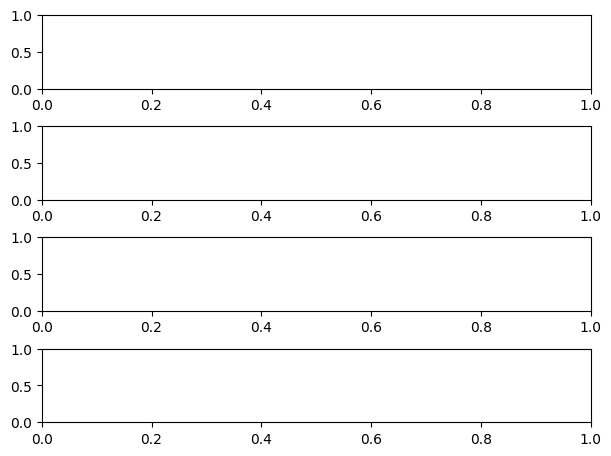

In [222]:
from scipy.stats import sem
from scipy.constants import golden
from datetime import datetime

ONE_COL_WIDTH_INCH = 6
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'mofid'
TARGET = 'VIS_bool'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), constrained_layout = True)
 
for num_epochs in [8, 16 , 25]:
    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION].index, 
            grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION][metric]['mean'],
            marker='o',
            label=f'{num_epochs} epochs'
        )
        ax[i].fill_between(
            grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION].index,
            grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION][metric]['sem'],
            grouped_res.loc[TARGET,BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[TARGET, BINS, num_epochs,REPRESENTATION][metric]['sem'],
            alpha=0.2
        )
        ax[i].set_ylim(0,1)
    
    #ylabel_top('accuracy', ax=ax[0])
    #ylabel_top(r'F$_1$ macro', ax=ax[1])
    #ylabel_top(r'F$_1$ micro', ax=ax[2])
    #ylabel_top(r'$\kappa$', ax=ax[3])
ax[-1].set_xlabel('training set size')

#matplotx.line_labels(ax[0])
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)

now = datetime.now().strftime('%Y%m%d_%H%M')
fig.suptitle('MOFs - {} - {}'.format(REPRESENTATION, TARGET), fontsize=16)
fig.savefig(f'{now}_MOFs-{REPRESENTATION}-{TARGET}-{BINS}bin-classification-results.pdf', bbox_inches='tight')